<a href="https://colab.research.google.com/github/premkumar6/Deep_learning/blob/main/Classify_women_clothing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.5.0


Loading data from Fashion_mnist 

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images,train_labels) , (test_images,test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
test_images.shape

(10000, 28, 28)

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

Preprocess the data


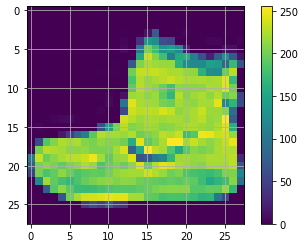

In [7]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid()
plt.show()

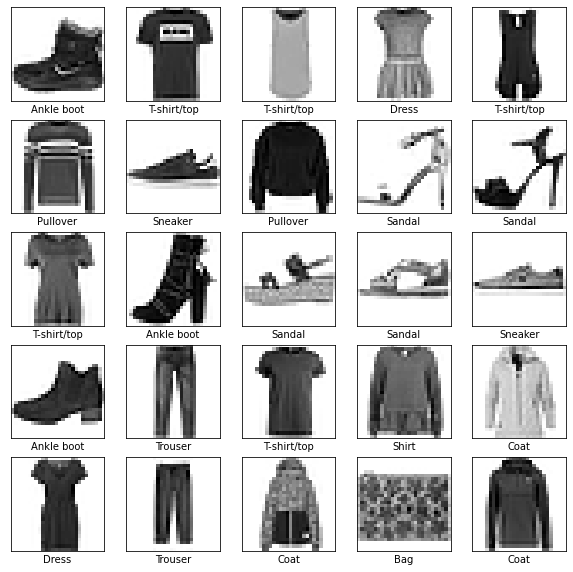

In [8]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])

plt.show()

Build the model

In [9]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [13]:
model = tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape=(28,28)),
                             tf.keras.layers.Dense(128,activation="relu"),
                             tf.keras.layers.Dense(10)])

            
    


Compile the model

In [16]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Train the model

In [17]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 4.0952 - accuracy: 0.6791
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7144 - accuracy: 0.7394
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5885 - accuracy: 0.7950
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5595 - accuracy: 0.8060
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5124 - accuracy: 0.8233
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5049 - accuracy: 0.8269
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5021 - accuracy: 0.8284
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4919 - accuracy: 0.8315
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4892 - accuracy: 0.8336
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.481

In [18]:
test_loss , test_acc = model.evaluate(test_images,test_labels,verbose=2)
print("\n Test accuracy", test_acc)

313/313 - 0s - loss: 0.5566 - accuracy: 0.8240

 Test accuracy 0.8240000009536743


In [19]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)                                        

In [20]:
predictions[0]

array([1.2782894e-29, 7.3656939e-25, 0.0000000e+00, 6.2014036e-24,
       0.0000000e+00, 5.3809726e-01, 0.0000000e+00, 1.1781669e-01,
       9.1919799e-22, 3.4408611e-01], dtype=float32)

In [21]:
np.argmax(predictions[0])

5

In [22]:
class_names[5]

'Sandal'

In [27]:
test_labels[0]

9

In [28]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

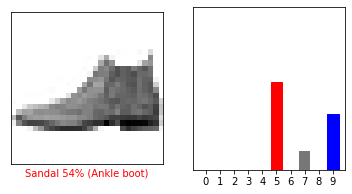

In [29]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

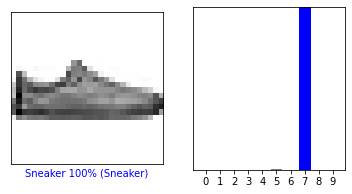

In [30]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

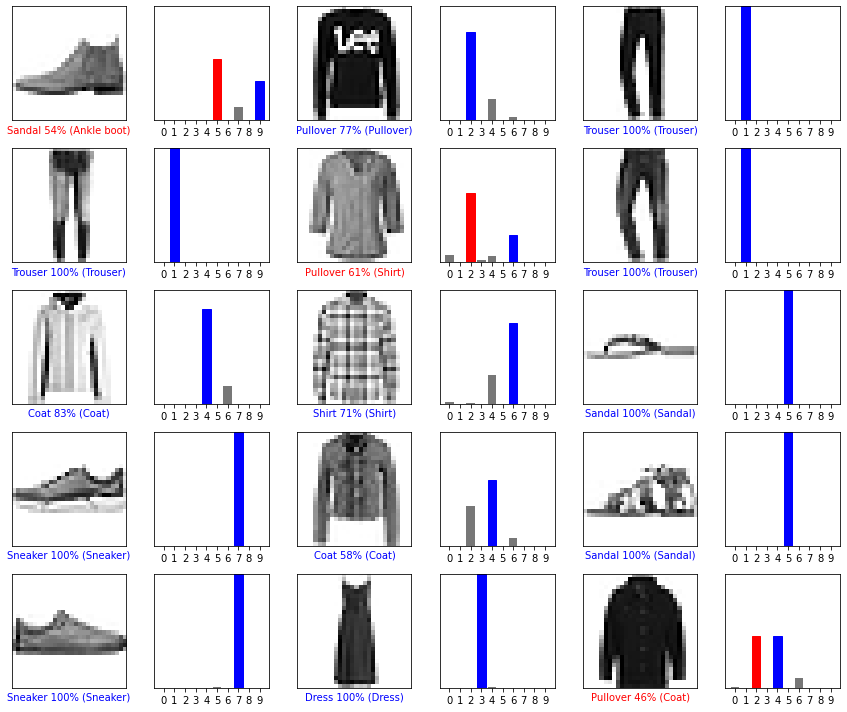

In [31]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()